In [4]:
import numpy as np
import scipy as sp
from scipy.integrate import odeint
import matplotlib.pyplot as plt

We want to solve the HO equations of motion numerically: $m\ddot{x} + c\dot{x} + kx = f(t) $

We can convert any ODE of order two into a system of two equations of first order by saying $ \dot{x} = v  \longrightarrow$ which gives $\frac{d}{dt}S = \frac{d}{dt} \begin{pmatrix} x \\ v \end{pmatrix} = \begin{pmatrix} v \\ \frac{f(t) - cv - kx}{m} \end{pmatrix}$, which is a system of coupled first order ODE's

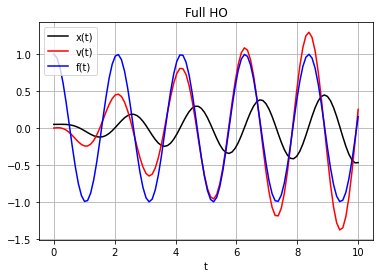

In [85]:
def f(t,k,m):
    '''gives the external force '''
    return np.cos(np.sqrt(k/m)*t)

def euler_2d(x_0,v_0,n,T, f,c,k,m):
    ''' n evaluations until T'''
    x = np.zeros(n+1)
    v = np.zeros(n+1)
    t = np.zeros(n+1)
    dt = T/n
    x[0] = x_0
    v[0] = v_0
    t[0] = 0
    for i in range(n):
        t[i+1] = t[k] + dt
        x[i+1] = x[i] + dt*v[i]
        v[i+1] = v[i] + dt*((f(t[i])- c*v[i] -k*x[i])/m)
    return x,v,t 
def main():
    k = 18.0
    m = 2.0
    c = 0.5
    x_0 = 5e-2
    v_0 = 0
    n = 100
    T = 10
    plt.plot(t,x, c='k',label = 'x(t)')
    plt.plot(t,v, c ='r',label = 'v(t)')
    plt.plot(t,f(t,k,m),c='b' ,label = 'f(t)')
    plt.legend(loc='best')
    plt.grid()
    plt.xlabel('t')
    plt.title('Full HO')
main()

### Using scipy 

In [69]:
def ext_f(t):
    '''gives the external force '''
    return np.cos(np.sqrt(k/m)*t)

def dSdt(t, S):
    x,v = S
    return [v, -k*x/m -c*v/m + ext_f(t)/m]
k = 18.0
m = 2.0
c = 0.5
x_0 = 5e-2
v_0 = 0
S_0 = (x_0,v_0)

Text(0.5, 1.0, 'Full HO')

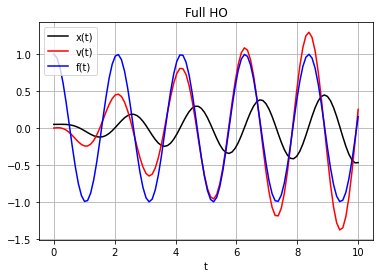

In [84]:
t = np.linspace(0,10,100)
sol = odeint(dSdt, y0=S_0, t=t, tfirst=True)
x = sol.T[0]
v = sol.T[1]
plt.plot(t,x,color= 'black',label='x(t)')
plt.plot(t,v, color='red',label = 'v(t)')
plt.plot(t,ext_f(t), c='b',label= 'f(t)')
plt.legend()
plt.grid()
plt.xlabel('t')
plt.title('Full HO')